# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
!pip install gymnasium

In [ ]:
# !pip install gymnasium[box2d]
!pip install ufal.pybox2d

In [ ]:
import gymnasium as gym

In [ ]:
def policy(env, state):
  action = env.action_space.sample()
  return action

In [ ]:
env = gym.make("LunarLander-v2")
observation, _ = env.reset()

is_done = False
total_reward = 0
while not is_done:
  action = policy(env, observation)
  observation, reward, terminated, truncated, _ = env.step(action)
  is_done = terminated or truncated
  total_reward += reward

env.close()

In [ ]:
total_reward

-107.66989226298918

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [x] Проверено на семинаре

In [ ]:
import gymnasium as gym
env = gym.make('Blackjack-v1')

total_reward = 0
for _ in range(10000):
  observation, _ = env.reset()
  is_done = False
  while not is_done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, _ = env.step(action)
    is_done = terminated or truncated
    print(reward)
    if reward == 1.0 or reward == 1.5:
        total_reward+=1

total_reward/10000


Выходные данные были обрезаны до нескольких последних строк (5000).
-1.0
-1.0
1.0
0.0
-1.0
0.0
1.0
-1.0
-1.0
0.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
-1.0
1.0
-1.0
1.0
0.0
-1.0
1.0
0.0
0.0
1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
0.0
-1.0
1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
0.0
0.0
1.0
-1.0
0.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
1.0
1.0
0.0
0.0
-1.0
-1.0
-1.0
1.0
1.0
0.0
0.0
-1.0
0.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
0.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
1.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
0.0
-1.0
1.0
-1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
-1.0
-1.0
-1.0
0.0
1.0
-1.0
0.0
-1.0
-1.0
1.0
0.0
0.0
1.0
-1.0
1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
1.0
0.0
1.0
-1.0
-1.0
1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
0.0
0.0
0.0
1.0
-1.0
0.0


0.2823

In [ ]:
total_reward/10000

0.2823

<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [x] Проверено на семинаре

In [ ]:
def policy(state):
    return 0 if state[0]>=1 else 1

In [ ]:
state = env.reset()
state = state[0]
print(state)

print(policy(state))

(21, 10, 1)
0


In [ ]:
import gymnasium as gym
env = gym.make('Blackjack-v1')
total_reward = 0
for _ in range(10000):
  observation, _ = env.reset()
  is_done = False
  while not is_done:
    state = env.reset()
    state = state[0]
    action = policy(state)
    observation, reward, terminated, truncated, _ = env.step(action)
    is_done = terminated or truncated
    if reward == 1.0 or reward == 1.5:
        total_reward+=1

total_reward/10000


0.4043

<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Стратегия поведения машины является частью окружения и должна быть реализована внутри него. Сделайте все соответствующие переменные и методы приватными (названия всех переменных начинаются с `__`), подчеркнув, что у пользователя не должно быть к ним доступа извне.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

**Стратегия выбора действия для второго игрока - случайный выбор**

##Тест

In [ ]:
import gymnasium
from gymnasium import spaces
import numpy as np
import random
from typing import Tuple
from abc import ABC, abstractmethod

In [ ]:
PLAYER1 = 1
PLAYER2 = 2
WIN = 1
TIE = 0.2
INVALID_MOVE = -0.3
ONGOING = -1

In [ ]:
class Player(ABC):
    @abstractmethod
    def play(self, board: np.ndarray) -> int:
        pass

In [ ]:
class RandomPlayer(Player):
    def play(self, board):
        return random.choices([i for i, _ in enumerate(board) if board[i] == 0])[0]

In [ ]:
class RLAgent(Player):
    def __init__(self, policy) -> None:
        self.policy = policy

    def play(self, board):
        return self.policy.predict(board)[0]

In [ ]:
class GameBoard:
    def __init__(self):
        self.reset_board()

    def get_board(self) -> np.ndarray:
        return self.board

    def set_cell(self, index: int, value: int) -> None:
        self.board[index] = value

    def get_cell(self, index: int) -> int:
        return self.board[index]

    def is_action_valid(self, action: int) -> bool:
        return action in [i for i, _ in enumerate(self.board) if self.board[i] == 0]

    def reset_board(self) -> np.ndarray:
        self.board = np.zeros(shape=(9,), dtype=np.int32)

In [ ]:
class GameState:
    def __init__(self, player1: Player, player2: Player) -> None:
        self.board = GameBoard()
        self.players = [player1, player2]
        self.turn = 0

    def reset_state(self) -> None:
        self.turn = 0
        self.board.reset_board()

    def get_board_state(self) -> np.ndarray:
        return self.board.get_board()

    def evaluate_status(self) -> float:
        if self.turn > 8:
            return TIE

        for i in range(3):
            if i == 0 or i == 2:
                # Diagonals
                if (
                    self.board.get_cell(i) == self.board.get_cell(4)
                    and self.board.get_cell(8 - i) == self.board.get_cell(i)
                    and self.board.get_cell(i) != 0
                ):
                    return WIN
            # Columns
            if (
                self.board.get_cell(i) == self.board.get_cell(i + 3)
                and self.board.get_cell(i + 6) == self.board.get_cell(i)
                and self.board.get_cell(i) != 0
            ):
                return WIN
            # Rows
            row = i * 3
            if (
                self.board.get_cell(row) == self.board.get_cell(row + 1)
                and self.board.get_cell(row + 2) == self.board.get_cell(row)
                and self.board.get_cell(row) != 0
            ):
                return WIN

        return ONGOING

    def make_move(self, action) -> Tuple[np.ndarray, float, bool]:
        current_player = self.turn % 2
        player = self.players[current_player]

        valid_move = self.board.is_action_valid(action)
        if valid_move:
            self.board.set_cell(action, PLAYER1 if current_player == 0 else PLAYER2)
            self.turn += 1
            reward = self.evaluate_status()
            if reward != ONGOING:
                if reward == WIN and current_player == 1:
                    # Если выиграл игрок, который ставит 2 (PLAYER2), то устанавливаем негативную награду
                    return self.get_board_state(), -1, True
                else:
                    return self.get_board_state(), reward, True

        return self.get_board_state(), 0 if valid_move else INVALID_MOVE, False

In [ ]:
random_player1 = RandomPlayer()
random_player2 = RandomPlayer()

# Создаем игру с двумя случайными игроками
game = GameState(player1=random_player1, player2=random_player2)

# Играем несколько ходов
for _ in range(10):
    action = game.players[game.turn % 2].play(game.get_board_state())
    observation, reward, done = game.make_move(action)

    print(f"Board state:\n{observation.reshape(3, 3)}\nReward: {reward}\nDone: {done}\n")

    if done:
        if reward == WIN and game.turn % 2 == 1:
            reward = -1
        elif reward == WIN and game.turn % 2 == 0:
            reward = 1

        print("Game Over! Player won!" if reward != 0.2 else "Game Over! It's a Tie!")
        break


Board state:
[[0 0 0]
 [1 0 0]
 [0 0 0]]
Reward: 0
Done: False

Board state:
[[0 0 0]
 [1 0 0]
 [0 2 0]]
Reward: 0
Done: False

Board state:
[[0 0 0]
 [1 0 0]
 [0 2 1]]
Reward: 0
Done: False

Board state:
[[0 0 0]
 [1 0 0]
 [2 2 1]]
Reward: 0
Done: False

Board state:
[[0 1 0]
 [1 0 0]
 [2 2 1]]
Reward: 0
Done: False

Board state:
[[0 1 0]
 [1 0 2]
 [2 2 1]]
Reward: 0
Done: False

Board state:
[[0 1 0]
 [1 1 2]
 [2 2 1]]
Reward: 0
Done: False

Board state:
[[0 1 2]
 [1 1 2]
 [2 2 1]]
Reward: 0
Done: False

Board state:
[[1 1 2]
 [1 1 2]
 [2 2 1]]
Reward: 0.2
Done: True

Game Over! It's a Tie!


##Test2

In [ ]:
PLAYER1 = 1
PLAYER2 = 2
WIN = 1
TIE = 0.2
INVALID_MOVE = -0.3
ONGOING = -1

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        self.observation_space = spaces.Box(low=0, high=2, shape=(3, 3), dtype=int)
        self.action_space = spaces.Discrete(9)  # Single integer representing cell index
        self.__game_state = GameState(RandomPlayer(), RandomPlayer())

    def reset(self):
        self.__game_state.reset_state()
        return self.__game_state.get_board_state().reshape((3, 3))

    def step(self, action):
        observation, reward, done = self.__game_state.make_move(action)
        observation = observation.reshape((3, 3))
        return observation, reward, done, {}

    def render(self, mode='human'):
        print(self.__game_state.get_board_state().reshape((3, 3)))

    def close(self):
        pass

class Player: #интерфейс для игрока в игре
    def play(self, board: np.ndarray) -> int:
        pass

class RandomPlayer(Player): #случайные ходы на игровом поле
    def play(self, board):
        return random.choices([i for i, _ in enumerate(board.flatten()) if _ == 0])[0]

class RLAgent(Player): #стратегия
    def __init__(self, policy) -> None:
        self.policy = policy

    def play(self, board):
        return self.policy.predict(board.flatten())[0]

class GameBoard:
    def __init__(self):
        self.reset_board()

    def get_board(self) -> np.ndarray:
        return self.board

    def set_cell(self, index: int, value: int) -> None:
        self.board[index] = value

    def get_cell(self, index: int) -> int:
        return self.board[index]

    def is_action_valid(self, action: int) -> bool:
        return self.board[action] == 0

    def reset_board(self) -> np.ndarray:
        self.board = np.zeros(shape=(9,), dtype=np.int32)

class GameState:
    def __init__(self, player1: Player, player2: Player) -> None:
        self.board = GameBoard()
        self.players = [player1, player2]
        self.turn = 0

    def reset_state(self) -> None:
        self.turn = 0
        self.board.reset_board()

    def get_board_state(self) -> np.ndarray:
        return self.board.get_board()

    def evaluate_status(self) -> float:
        if self.turn > 8:
            return TIE

        for i in range(3):
            if i == 0 or i == 2:
                # Diagonals
                if (
                    self.board.get_cell(i) == self.board.get_cell(4)
                    and self.board.get_cell(8 - i) == self.board.get_cell(i)
                    and self.board.get_cell(i) != 0
                ):
                    return WIN
            # Columns
            if (
                self.board.get_cell(i) == self.board.get_cell(i + 3)
                and self.board.get_cell(i + 6) == self.board.get_cell(i)
                and self.board.get_cell(i) != 0
            ):
                return WIN
            # Rows
            row = i * 3
            if (
                self.board.get_cell(row) == self.board.get_cell(row + 1)
                and self.board.get_cell(row + 2) == self.board.get_cell(row)
                and self.board.get_cell(row) != 0
            ):
                return WIN

        return ONGOING

    def make_move(self, action) -> Tuple[np.ndarray, float, bool]:
        current_player = self.turn % 2
        player = self.players[current_player]

        valid_move = self.board.is_action_valid(action)
        if valid_move:
            self.board.set_cell(action, PLAYER1 if current_player == 0 else PLAYER2)
            self.turn += 1
            reward = self.evaluate_status()
            if reward != ONGOING:
                if reward == WIN and current_player == 1:
                    # Если выиграл игрок, который ставит 2 (PLAYER2), то устанавливаем негативную награду
                    return self.get_board_state(), -1, True
                else:
                    return self.get_board_state(), reward, True

        return self.get_board_state(), 0 if valid_move else INVALID_MOVE, False

In [ ]:
env = TicTacToeEnv()

player1_wins = 0
player2_wins = 0
ties = 0

# Играем 1000 эпизодов
for _ in range(10000):
    observation = env.reset()
    is_done = False
    while not is_done:
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        is_done = done
        if reward == 1.0:
            player1_wins += 1
        elif reward == -1.0:
            player2_wins += 1
        elif reward == 0.2:
            ties += 1

# Вывод результатов
print(f"Player 1 wins: {player1_wins} times ({(player1_wins / 10000) * 100}% of the time)")
print(f"Player 2 wins: {player2_wins} times ({(player2_wins / 10000) * 100}% of the time)")
print(f"Ties: {ties} times ({(ties / 10000) * 100}% of the time)")

Player 1 wins: 3628 times (36.28% of the time)
Player 2 wins: 2794 times (27.939999999999998% of the time)
Ties: 3578 times (35.78% of the time)


##Train

In [ ]:
PLAYER1 = 1
PLAYER2 = 2
WIN = 1
TIE = 0.2
INVALID_MOVE = -0.3
ONGOING = -1

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        self.observation_space = spaces.Box(low=0, high=2, shape=(3, 3), dtype=int)
        self.action_space = spaces.Discrete(9)  # Single integer representing cell index
        self.__game_state = GameState(RandomPlayer(), RandomPlayer())

    def reset(self):
        self.__game_state.reset_state()
        return self.__game_state.get_board_state().reshape((3, 3))

    def step(self, action):
        observation, reward, done = policy(self.__game_state, action)
        observation = observation.reshape((3, 3))
        return observation, reward, done, {}

    def render(self, mode='human'):
        print(self.__game_state.get_board_state().reshape((3, 3)))

    def close(self):
        pass


class Player:##интерфейс для игрока в игре
    def play(self, board: np.ndarray) -> int:
        pass

class RandomPlayer(Player):##случайные ходы на игровом поле
    def play(self, board):
        return random.choices([i for i, _ in enumerate(board.flatten()) if _ == 0])[0]

class RLAgent(Player):##стратегия
    def __init__(self, policy) -> None:
        self.policy = policy

    def play(self, board):
        return self.policy.predict(board.flatten())[0]

class GameBoard: #управление состоянием и действием в игровом поле
    def __init__(self):
        self.reset_board()

    def get_board(self) -> np.ndarray: #Возвращает текущее состояние игровой доски
        return self.board

    def set_cell(self, index: int, value: int) -> None: # Устанавливает значение ячейки в указанном индексе игровой доски.
        self.board[index] = value

    def get_cell(self, index: int) -> int:#Возвращает значение ячейки в указанном индексе игровой доски.
        return self.board[index]

    def is_action_valid(self, action: int) -> bool: #Проверяет, является ли указанное действие допустимым
        return self.board[action] == 0

    def reset_board(self) -> np.ndarray:#Сбрасывает состояние игровой доски, заполняя ее нулями.
        self.board = np.zeros(shape=(9,), dtype=np.int32)

class GameState:
    def __init__(self, player1: Player, player2: Player) -> None:
        self.board = GameBoard()
        self.players = [player1, player2]
        self.turn = 0

    def reset_state(self) -> None:#Сбрасывает состояние игры до начального
        self.turn = 0
        self.board.reset_board()

    def get_board_state(self) -> np.ndarray:#Возвращает текущее состояние игровой доски
        return self.board.get_board()

    def evaluate_status(self) -> float:#Оценивает текущий статус игры
        if self.turn > 8:
            return TIE

        for i in range(3):
            if i == 0 or i == 2:
                # Diagonals
                if (
                    self.board.get_cell(i) == self.board.get_cell(4)
                    and self.board.get_cell(8 - i) == self.board.get_cell(i)
                    and self.board.get_cell(i) != 0
                ):
                    return WIN
            # Columns
            if (
                self.board.get_cell(i) == self.board.get_cell(i + 3)
                and self.board.get_cell(i + 6) == self.board.get_cell(i)
                and self.board.get_cell(i) != 0
            ):
                return WIN
            # Rows
            row = i * 3
            if (
                self.board.get_cell(row) == self.board.get_cell(row + 1)
                and self.board.get_cell(row + 2) == self.board.get_cell(row)
                and self.board.get_cell(row) != 0
            ):
                return WIN

        return ONGOING

In [ ]:
def policy(game_state, action) -> Tuple[np.ndarray, float, bool]:
    current_player = game_state.turn % 2 #Определяет, чей сейчас ход, используя остаток от деления текущего хода на 2
    player = game_state.players[current_player]

    valid_move = game_state.board.is_action_valid(action)
    if valid_move:
        game_state.board.set_cell(action, PLAYER1 if current_player == 0 else PLAYER2)
        game_state.turn += 1
        reward = game_state.evaluate_status()
        if reward != ONGOING:
            if reward == WIN and current_player == 1:
                return game_state.get_board_state(), -1, True
            else:
                return game_state.get_board_state(), reward, True

    return game_state.get_board_state(), 0 if valid_move else INVALID_MOVE, False

In [ ]:
env = TicTacToeEnv()

player1_wins = 0
player2_wins = 0
ties = 0

# Играем 1000 эпизодов
for _ in range(10000):
    observation = env.reset()
    is_done = False
    while not is_done:
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        is_done = done
        if reward == 1.0:
            player1_wins += 1
        elif reward == -1.0:
            player2_wins += 1
        elif reward == 0.2:
            ties += 1

# Вывод результатов
print(f"Player 1 wins: {player1_wins} times ({(player1_wins / 10000) * 100}% of the time)")
print(f"Player 2 wins: {player2_wins} times ({(player2_wins / 10000) * 100}% of the time)")
print(f"Ties: {ties} times ({(ties / 10000) * 100}% of the time)")

Player 1 wins: 3576 times (35.76% of the time)
Player 2 wins: 2837 times (28.37% of the time)
Ties: 3587 times (35.870000000000005% of the time)


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

**Стратегия в том, что игрок 1 ставит свой знак в самый центр поля, уже не давая возможность игроку 2 выиграть по диагональным линиям**

In [ ]:
def policy(game_state, action) -> Tuple[np.ndarray, float, bool]:
    current_player = game_state.turn % 2
    player = game_state.players[current_player]

    # If it's the first move, and the action is not in the center, place the symbol in the center
    if game_state.turn == 0 and action != 4:
        action = 4

    valid_move = game_state.board.is_action_valid(action)
    if valid_move:
        game_state.board.set_cell(action, PLAYER1 if current_player == 0 else PLAYER2)
        game_state.turn += 1
        reward = game_state.evaluate_status()
        if reward != ONGOING:
            if reward == WIN and current_player == 1:
                return game_state.get_board_state(), -1, True
            else:
                return game_state.get_board_state(), reward, True

    return game_state.get_board_state(), 0 if valid_move else INVALID_MOVE, False


In [ ]:
env = TicTacToeEnv()

player1_wins = 0
player2_wins = 0
ties = 0

# Играем 1000 эпизодов
for _ in range(10000):
    observation = env.reset()
    is_done = False
    while not is_done:
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        is_done = done
        if reward == 1.0:
            player1_wins += 1
        elif reward == -1.0:
            player2_wins += 1
        elif reward == 0.2:
            ties += 1

# Вывод результатов
print(f"Player 1 wins: {player1_wins} times ({(player1_wins / 10000) * 100}% of the time)")
print(f"Player 2 wins: {player2_wins} times ({(player2_wins / 10000) * 100}% of the time)")
print(f"Ties: {ties} times ({(ties / 10000) * 100}% of the time)")

Player 1 wins: 4815 times (48.15% of the time)
Player 2 wins: 1954 times (19.54% of the time)
Ties: 3231 times (32.31% of the time)


**Результаты улучшились благодаря этой стратегии**

In [ ]:
env = TicTacToeEnv()

observation = env.reset()
total_reward = 0
is_done = False

while not is_done:
    current_player = env._TicTacToeEnv__game_state.turn % 2
    player = env._TicTacToeEnv__game_state.players[current_player]

    # Ход текущего игрока согласно стратегии policy
    action = player.play(env._TicTacToeEnv__game_state.board.get_board())

    observation, reward, done, _ = env.step(action)
    total_reward += reward
    is_done = done

    # Вывод действия и текущего состояния доски
    print(f"Board state:\n{observation}\nReward: {reward}\nDone: {done}\n")

# Вывод итоговой награды за сессию
print(f"Total reward: {total_reward}")

if total_reward == 1.0:
    print("Player 1 wins!")
elif total_reward == -1.0:
    print("Player 2 wins!")
elif total_reward == 0.2:
    print("It's a tie!")

Board state:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Reward: 0
Done: False

Board state:
[[0 2 0]
 [0 1 0]
 [0 0 0]]
Reward: 0
Done: False

Board state:
[[0 2 1]
 [0 1 0]
 [0 0 0]]
Reward: 0
Done: False

Board state:
[[0 2 1]
 [0 1 0]
 [0 0 2]]
Reward: 0
Done: False

Board state:
[[0 2 1]
 [0 1 0]
 [1 0 2]]
Reward: 1
Done: True

Total reward: 1
Player 1 wins!


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

**??????**

In [ ]:
def show_video(episode: int = 0):
    return display(Video(f'video/rl-video-episode-{episode}.mp4', embed=True))

show_video()

In [ ]:
from gymnasium.wrappers.record_video import RecordVideo
from IPython.display import Video
import os

env = gym.make("MountainCar-v0", render_mode="rgb_array")
video_folder = "./Car"
os.makedirs(video_folder, exist_ok=True)
env = RecordVideo(env, video_folder, episode_trigger=lambda x: x % 5 == 0)

# Проводим инициализацию и запоминаем начальное состояние
for episode in range(10):
    observation = env.reset()
    done = False

    while not done:
        env.render()
        action = env.action_space.sample()
        observation, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

env.close()

for episode in range(0, 10, 5):
    show_video(episode)


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/Car folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/Car/rl-video-episode-0.mp4.
Moviepy - Writing video /content/Car/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/Car/rl-video-episode-0.mp4
Moviepy - Building video /content/Car/rl-video-episode-5.mp4.
Moviepy - Writing video /content/Car/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/Car/rl-video-episode-5.mp4
Moviepy - Building video /content/Car/rl-video-episode-10.mp4.
Moviepy - Writing video /content/Car/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/Car/rl-video-episode-10.mp4


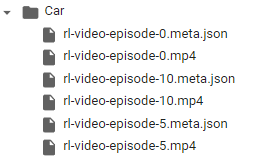

In [ ]:
gym

<module 'gymnasium' from '/usr/local/lib/python3.10/dist-packages/gymnasium/__init__.py'>

Проблемный код

In [ ]:
RecordVideo

gymnasium.wrappers.record_video.RecordVideo

## Обратная связь
- [ ] Хочу получить обратную связь по решению